# ------------------- Brain Tumor Segmentation & Classification -------------------

### Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob

### Read Images Dataset Path

In [2]:
path_yes = glob.glob("C:/Users/moham/Desktop/Medical Image Processing Project/dataset_yes/*.jpg")
path_no = glob.glob("C:/Users/moham/Desktop/Medical Image Processing Project/dataset_no/*.jpg")

### Segmentation - Brain With Tumor

In [3]:
i = 0
for image in path_yes:
    input_image = np.array(Image.open(image))
    resized = cv2.resize(input_image,(512,512))
    if(len(resized.shape) > 2):
        
        # Convert From RGB to GRAYScale
        gray_image = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
        
        # Thresholding 
        T, threshold_image = cv2.threshold(gray_image,160,255,cv2.THRESH_BINARY)
        
        # opening
        kernel = np.ones((7,7), 'uint8')
        open_img=cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN,kernel)
        
        # Closing
        close_img=cv2.morphologyEx(open_img,cv2.MORPH_CLOSE,kernel)
        
            
        # connected Components in Images
        num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(close_img, connectivity = 4)
       # print(stats)
        for k in range(1,num_labels):
                
            pts = np.where(labels_im == k)
            size = stats[k, cv2.CC_STAT_AREA]
            if size > 5000 and size < 50000:
                labels_im[pts] = labels_im[pts]
            else:
                labels_im[pts] =0
                    
        label_hue = np.uint8(179*labels_im/np.max(labels_im))
        # Ignore Dividing By 0 Value Error
        np.seterr(divide='ignore' , invalid='ignore')

        blank_ch = 255*np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
        labeled_img[label_hue==0] = 0
         
        # Convert to Gray    
        Gray = cv2.cvtColor(labeled_img , cv2.COLOR_BGR2GRAY)
        
            
        cv2.imwrite('C:/Users/moham/Desktop/Medical Image Processing Project/Result_yes/0'+ str(i)+'.jpg',Gray)
        i = i + 1

### Segmentation - Brain With Non-Tumor

In [4]:
i = 0
for image in path_no:
    input_image = np.array(Image.open(image))
    resized = cv2.resize(input_image,(512,512))
    if(len(resized.shape) > 2):
        
        # Convert From RGB to GRAYScale
        gray_image = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
        
        
        # Thresholding 
        T, threshold_image = cv2.threshold(gray_image,160,255,cv2.THRESH_BINARY)
        
        # opening
        kernel = np.ones((7,7), 'uint8')
        open_img=cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN,kernel)
        
        # Closing
        close_img=cv2.morphologyEx(open_img,cv2.MORPH_CLOSE,kernel)
        
            
        # connected Components in Images
        num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(close_img, connectivity = 4)
        for k in range(1,num_labels):
                
            pts = np.where(labels_im == k)
            size = stats[k, cv2.CC_STAT_AREA]
            if size > 5000 and size < 50000:
                labels_im[pts] = labels_im[pts]
            else:
                labels_im[pts] =0
                    
        label_hue = np.uint8(179*labels_im/np.max(labels_im))
        # Ignore Dividing By 0 Value Error
        np.seterr(divide='ignore' , invalid='ignore')

        blank_ch = 255*np.ones_like(label_hue)
        labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
        labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
        labeled_img[label_hue==0] = 0
         
        # Convert to Gray    
        Gray = cv2.cvtColor(labeled_img , cv2.COLOR_BGR2GRAY)
        
            
        cv2.imwrite('C:/Users/moham/Desktop/Medical Image Processing Project/Result_no/0'+ str(i)+'.jpg',Gray)
        i = i + 1

### Classification - Based of Number of Blobs

Enter Image Path: 
C:\Users\moham\Desktop\Medical Image Processing Project\dataset_yes\Y1.jpg


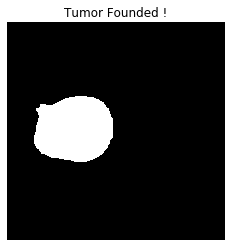

In [3]:
print("Enter Image Path: ")
Read_img = input()
input_image = np.array(Image.open(Read_img))
resized = cv2.resize(input_image,(512,512))
if(len(resized.shape) > 2):
    # Convert From RGB to GRAYScale
    gray_image = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
        
        
        # Thresholding 
    T, threshold_image = cv2.threshold(gray_image,160,255,cv2.THRESH_BINARY)
        
        # opening
    kernel = np.ones((7,7), 'uint8')
    open_img=cv2.morphologyEx(threshold_image,cv2.MORPH_OPEN,kernel)
        
        # Closing
    close_img=cv2.morphologyEx(open_img,cv2.MORPH_CLOSE,kernel)
        
            
        # connected Components in Images
    num_labels, labels_im, stats, centroids = cv2.connectedComponentsWithStats(close_img, connectivity = 4)
        
    for k in range(1,num_labels):
                
        pts = np.where(labels_im == k)
        size = stats[k, cv2.CC_STAT_AREA]
        if size > 5000 and size < 50000:
            labels_im[pts] = labels_im[pts]
        else:
            labels_im[pts] =0
                    
    label_hue = np.uint8(179*labels_im/np.max(labels_im))
        # Ignore Dividing By 0 Value Error
    np.seterr(divide='ignore' , invalid='ignore')

    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[label_hue==0] = 0
         
        # Convert to Gray    
    Gray = cv2.cvtColor(labeled_img , cv2.COLOR_BGR2GRAY)
        
    if(num_labels > 1 ):
        plt.title('Tumor Founded !')
        plt.gray()
        plt.axis('off')
        plt.imshow(Gray)
    else:
        plt.title('No Tumor Founded !')
        plt.gray()
        plt.axis('off')
        plt.imshow(Gray)

## Accuracy

#### TP (True Positive): Existing tumor and detected correctly. |   TN (True Negative): Non-existing tumor and not detected. 
#### FP (False Positive): Non-existing tumor and detected.          |   FN (False Negative): Existing tumor and not detected

In [32]:
(51 + 79) /(51+79+38+10) * 100

73.03370786516854

## Sensitivity
#### measure of successful determination of the person having a tumor

In [6]:
51 / (51 + 10) * 100

83.60655737704919

## Specificity
#### measure of successful determination of the person not having a tumor

In [4]:
79 / (79 + 38) * 100

67.52136752136752